# Изазов: Анализа текста о науци о подацима

У овом примеру, урадићемо једноставну вежбу која обухвата све кораке традиционалног процеса науке о подацима. Не морате писати никакав код, можете само кликнути на ћелије испод да их извршите и посматрате резултат. Као изазов, охрабрујемо вас да испробате овај код са различитим подацима.

## Циљ

У овом часу, разговарали смо о различитим концептима везаним за науку о подацима. Хајде да покушамо да откријемо више повезаних концепата кроз **рударење текста**. Почећемо са текстом о науци о подацима, извући кључне речи из њега, а затим покушати да визуализујемо резултат.

Као текст, користићемо страницу о науци о подацима са Википедије:


In [62]:
url = 'https://en.wikipedia.org/wiki/Data_science'

## Корак 1: Преузимање података

Први корак у сваком процесу обраде података је преузимање података. Користићемо библиотеку `requests` за то:


In [63]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1a104647-90de-485a-b88a-1406e889a5d1","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1038046078,"wgRevisionId":1038046078,"wgArticleId":35458904,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: others","Articles with short description","Short description matches Wikidata","Use dmy dates from December 2012","Information science","Computer occupations"

## Корак 2: Трансформисање података

Следећи корак је конвертовање података у облик погодан за обраду. У нашем случају, преузели смо HTML изворни код са странице и потребно је да га претворимо у обичан текст.

Постоји много начина да се ово уради. Ми ћемо користити најједноставнији уграђени [HTMLParser](https://docs.python.org/3/library/html.parser.html) објекат из Python-а. Потребно је да наследимо `HTMLParser` класу и дефинишемо код који ће сакупљати сав текст унутар HTML ознака, осим ознака `<script>` и `<style>`.


In [64]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Data science From Wikipedia, the free encyclopedia Jump to navigation Jump to search Interdisciplinary field of study focused on deriving knowledge and insights from data Not to be confused with  information science . The existence of  Comet NEOWISE  (here depicted as a series of red dots) was discovered by analyzing  astronomical survey  data acquired by a  space telescope , the  Wide-field Infrared Survey Explorer . Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection AutoML Association rules Reinforcement learning Structured prediction Feature engineering Feature learning Online learning Semi-supervised learning Unsupervised learning Learning to rank Grammar induction Supervised learning ( classification  •  regression ) Decision trees Ensembles Bagging Boosting Random forest k -NN Linear regression Naive Bayes Artificial neural networks Logistic regression Perceptron Relevance vector machine 

## Корак 3: Добијање увида

Најважнији корак је претварање наших података у облик из којег можемо извући увиде. У нашем случају, желимо да извучемо кључне речи из текста и видимо које кључне речи су значајније.

Користићемо Python библиотеку звану [RAKE](https://github.com/aneesha/RAKE) за издвајање кључних речи. Прво, хајде да инсталирамо ову библиотеку у случају да није већ присутна:


In [65]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


Главна функционалност је доступна из `Rake` објекта, који можемо прилагодити користећи неке параметре. У нашем случају, поставићемо минималну дужину кључне речи на 5 карактера, минималну учесталост кључне речи у документу на 3, и максималан број речи у кључној речи на 2. Слободно експериментишите са другим вредностима и посматрајте резултат.


In [66]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('machine learning', 4.0),
 ('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('data science', 3.909090909090909),
 ('computer science', 3.909090909090909),
 ('information science', 3.797979797979798),
 ('data analysis', 3.666666666666667),
 ('application domains', 3.6),
 ('science', 1.9090909090909092),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('classification', 1.2),
 ('techniques', 1.1666666666666667),
 ('datasets', 1.0),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

Добили смо листу термина заједно са одговарајућим степеном важности. Као што можете видети, најрелевантније дисциплине, као што су машинско учење и велики подаци, налазе се на врху листе.

## Корак 4: Визуелизација резултата

Људи најбоље тумаче податке у визуелном облику. Због тога често има смисла визуелизовати податке како бисмо извукли одређене увиде. Можемо користити библиотеку `matplotlib` у Пајтону да прикажемо једноставну дистрибуцију кључних речи са њиховом релевантношћу:


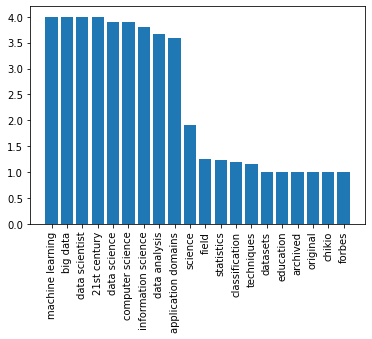

In [67]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

Међутим, постоји још бољи начин да се визуализују учесталости речи - коришћењем **облака речи**. Биће нам потребно да инсталирамо још једну библиотеку како бисмо нацртали облак речи из наше листе кључних речи.


In [71]:
!{sys.executable} -m pip install wordcloud

`WordCloud` објекат је одговоран за примање или оригиналног текста, или унапред израчунате листе речи са њиховим фреквенцијама, и враћа слику, која затим може бити приказана користећи `matplotlib`:


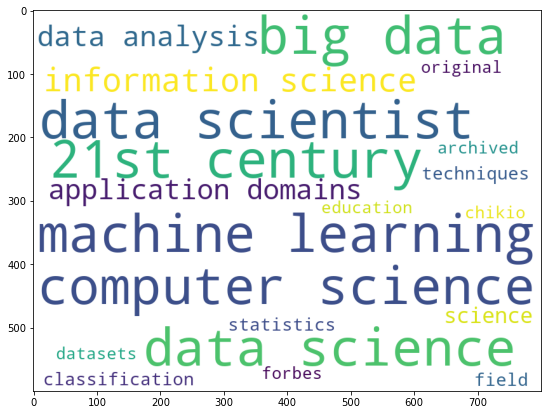

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

Можемо такође проследити оригинални текст у `WordCloud` - хајде да видимо да ли можемо добити сличан резултат:


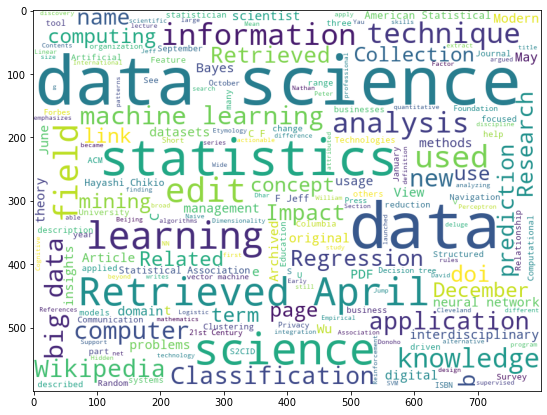

In [70]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Можете видети да облак речи сада изгледа импресивније, али такође садржи доста шума (нпр. нерелевантне речи као што је `Retrieved on`). Такође добијамо мање кључних речи које се састоје од две речи, као што су *data scientist* или *computer science*. Ово је зато што RAKE алгоритам много боље обавља посао у избору добрих кључних речи из текста. Овај пример илуструје важност претходне обраде и чишћења података, јер јасна слика на крају омогућава доношење бољих одлука.

У овом задатку прошли смо кроз једноставан процес извлачења значења из Википедијског текста, у облику кључних речи и облака речи. Овај пример је прилично једноставан, али добро демонстрира све типичне кораке које ће један научник података предузети када ради са подацима, почевши од прикупљања података па до визуализације.

На нашем курсу ћемо детаљно разговарати о свим тим корацима.



---

**Одрицање од одговорности**:  
Овај документ је преведен коришћењем услуге за превођење помоћу вештачке интелигенције [Co-op Translator](https://github.com/Azure/co-op-translator). Иако настојимо да обезбедимо тачност, молимо вас да имате у виду да аутоматизовани преводи могу садржати грешке или нетачности. Оригинални документ на изворном језику треба сматрати меродавним извором. За критичне информације препоручује се професионални превод од стране људи. Не сносимо одговорност за било каква неспоразумевања или погрешна тумачења која могу произаћи из коришћења овог превода.
